# Final Project

## Framing

**Introduction**: My dataset is derived from student presentations last semester on Multimodal Learning Analytics. It includes ratings of individual student performance as well as empatica data on different physiological parameters

**Research question(s)**: I'd like to find correlations within the existing data. This includes 1) Correlations between physiological characteristics 2) Clustering within these characteristics among strong performers

**Hypotheses**:
    * Expect to see a positive correlation between movement and HR
    * Expect to see a positive correlation between temperature and HR

**Results**:
    * I'm going to use models of time series to observe visual correlation and then use Pearson's coefficient to make it  
    rigorous

**Threads**
    * Variations between individual users might not be accounted for in the results

## Data Exploration

The raw data I'm using for correlation analysis is from Empatica: temperature, heart-rate, EDA and movement

## Data Cleaning

Clean you data in this section, and make sure it's ready to be analyzed for next week!

In [7]:
# 1) Importing and reviewing the data from the aggregated file

import pandas as pd 
import os

path_to_file = "/Users/Jazib Zahir/Documents/HarvardTIE/ComputationalMethods/FinalDataSet/aggregated-1.csv"
data = pd.read_csv(path_to_file, encoding='utf-8')
data

,EDA,TEMP,unix time,tags,HR,EDA real time,Movement,filename,id
0,0.340049,32.63,1.537275e+09,Tag 1,93.17,2018-09-18 08:50:33,8.000000,8Merged.csv,1.0
1,0.319011,32.61,1.537275e+09,Tag 1,93.07,2018-09-18 08:50:34,4.333333,8Merged.csv,2.0
2,0.124158,32.63,1.537275e+09,Tag 1,92.92,2018-09-18 08:50:35,10.333333,8Merged.csv,3.0
3,0.026929,32.65,1.537275e+09,Tag 1,92.75,2018-09-18 08:50:36,8.666667,8Merged.csv,4.0
4,0.124635,32.61,1.537275e+09,Tag 1,92.62,2018-09-18 08:50:37,14.666667,8Merged.csv,5.0
5,0.000000,32.65,1.537275e+09,Tag 1,92.45,2018-09-18 08:50:38,6.333333,8Merged.csv,6.0
6,0.000000,32.63,1.537275e+09,Tag 1,92.28,2018-09-18 08:50:39,25.666667,8Merged.csv,7.0
7,0.081407,32.63,1.537275e+09,Tag 1,92.20,2018-09-18 08:50:40,14.000000,8Merged.csv,8.0
8,0.230261,32.59,1.537275e+09,Tag 1,92.10,2018-09-18 08:50:41,11.333333,8Merged.csv,9.0
9,0.349711,32.65,1.537275e+09,Tag 1,92.02,2018-09-18 08:50:42,12.333333,8Merged.csv,10.0


In [8]:
# 2) Checking the data shape
data.shape

(64040, 9)

In [9]:
# 3) Checking the number of dimensions
data.ndim



2

In [10]:
# 4) Checking the header of the file
data.head()

,EDA,TEMP,unix time,tags,HR,EDA real time,Movement,filename,id
0,0.340049,32.63,1.537275e+09,Tag 1,93.17,2018-09-18 08:50:33,8.000000,8Merged.csv,1.0
1,0.319011,32.61,1.537275e+09,Tag 1,93.07,2018-09-18 08:50:34,4.333333,8Merged.csv,2.0
2,0.124158,32.63,1.537275e+09,Tag 1,92.92,2018-09-18 08:50:35,10.333333,8Merged.csv,3.0
3,0.026929,32.65,1.537275e+09,Tag 1,92.75,2018-09-18 08:50:36,8.666667,8Merged.csv,4.0
4,0.124635,32.61,1.537275e+09,Tag 1,92.62,2018-09-18 08:50:37,14.666667,8Merged.csv,5.0


In [11]:
# 5) Checking the tail of the file
data.tail(5)

,EDA,TEMP,unix time,tags,HR,EDA real time,Movement,filename,id
64035,0.830626,32.31,1.542119e+09,Tag 3,83.35,2018-11-13 09:28:03,-14.666667,12Merged.csv,2126.0
64036,0.870809,32.31,1.542119e+09,Tag 3,83.42,2018-11-13 09:28:04,-28.000000,12Merged.csv,2127.0
64037,0.895306,32.31,1.542119e+09,Tag 3,83.47,2018-11-13 09:28:05,20.000000,12Merged.csv,2128.0
64038,0.902626,32.29,1.542119e+09,Tag 3,83.57,2018-11-13 09:28:06,22.000000,12Merged.csv,2129.0
64039,0.895904,32.29,1.542119e+09,Tag 3,83.72,2018-11-13 09:28:07,16.666667,12Merged.csv,2130.0


In [12]:
# 6) Checking the data types
data.dtypes

EDA              float64
TEMP             float64
unix time        float64
tags              object
HR               float64
EDA real time     object
Movement         float64
filename          object
id               float64
dtype: object

In [13]:
# 7) Getting descriptions of the tags

data['tags'].describe()

count     63840
unique        4
top       Tag 3
freq      47474
Name: tags, dtype: object

In [14]:
# 8) Cleaning the data by dropping the not available tags

cleaned_data = data.dropna()

In [15]:
# 9) Checking the shape of the cleaned data

cleaned_data.shape

(63840, 9)

In [16]:
# 10) Removing rows with 0 values

cleaned_data1 = cleaned_data[(cleaned_data != 0).all(1)]

In [17]:
# 11) Finding the shape of the cleaned data

cleaned_data1.shape

(63163, 9)

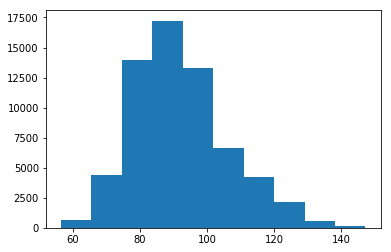

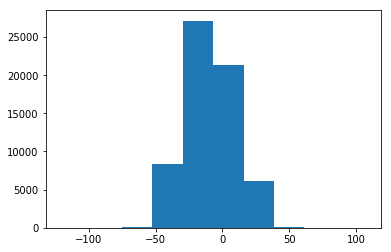

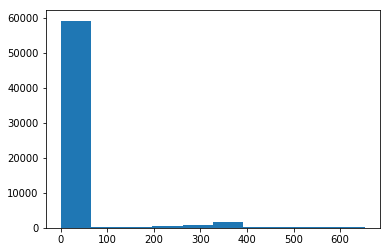

In [18]:
# 12) Setting up histograms for data on movement, temperature and HR 

import matplotlib.pyplot as plt
%matplotlib inline 

plt.hist(cleaned_data1['HR'])
plt.show()

plt.hist(cleaned_data1['Movement'])
plt.show()

plt.hist(cleaned_data1['TEMP'])
plt.show()


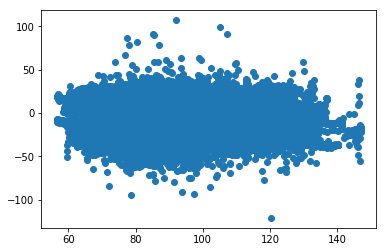

In [19]:
# 13) Looking for correlations between HR and Movement

df = cleaned_data1

plt.scatter(df['HR'],df['Movement'])
plt.show()





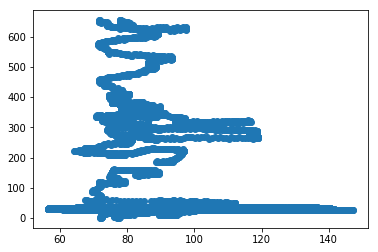

In [20]:
# 14) Looking for correlations between temperature and HR 


plt.scatter(df['HR'],df['TEMP'])
plt.show()

In [21]:
# 14) Calculating correlations between HR and Movement

import scipy
from scipy.stats import pearsonr

print(pearsonr(df['HR'],df['Movement']))


(0.001873823610782389, 0.6376942004680985)


In [22]:
# 15) Calculating correlations between HR and Temperature

print(pearsonr(df['HR'],df['TEMP']))

(-0.14912269036292414, 7.79735909933e-311)


In [23]:
# 16) Setting up a dataframe including Filename, average values and standard deviation of values 

#First start by importing the ratings sheet

path_to_file = "/Users/Jazib Zahir/Documents/HarvardTIE/ComputationalMethods/FinalDataSet/MasterSpreadsheet.csv"
df = pd.read_csv(path_to_file, encoding='utf-8')
df


,Filename,Eye Contact,Gesticulation,Enthusiasm,Intentional Pauses,"Vocalized pauses (uh, ah, um, etc.)",Rating,Structure,Completeness,Creativity,Audience involvement
0,9Merged.csv,4,4,4,3,3,3.6,4,4,4,4
1,11Merged.csv,3,3,3,3,3,3.0,4,4,4,4
2,1Merged.csv,2,3,5,3,2,3.0,4,5,4,2
3,5Merged.csv,2,2,3,3,3,2.6,4,3,3,4
4,17Merged.csv,2,4,4,3,3,3.2,3,4,2,3
5,30Merged.csv,3,4,5,4,4,4.0,4,4,4,5
6,12Merged.csv,3,4,3,3,2,3.0,4,5,4,2
7,28Merged.csv,2,3,3,3,2,2.6,4,4,4,5
8,14Merged.csv,4,3,3,3,3,3.2,4,4,4,4
9,21Merged.csv,2,4,4,3,4,3.4,3,3,2,3


In [24]:
# 17) We only want to keep the filename and rating

df1 = df[['Filename','Rating']]
df1.head()

,Filename,Rating
0,9Merged.csv,3.6
1,11Merged.csv,3.0
2,1Merged.csv,3.0
3,5Merged.csv,2.6
4,17Merged.csv,3.2


In [25]:
# 18) We want to reduce the aggregated file to only having average and standard deviations of each parameter
# First we clean the file again

path_to_file = "/Users/Jazib Zahir/Documents/HarvardTIE/ComputationalMethods/FinalDataSet/aggregated-1.csv"
df2 = pd.read_csv(path_to_file, encoding='utf-8')

df2_cleaned = df2.dropna()
df2_cleaned_further = df2_cleaned[(df2_cleaned != 0).all(1)]
df2 = df2_cleaned_further
df2.head()

,EDA,TEMP,unix time,tags,HR,EDA real time,Movement,filename,id
0,0.340049,32.63,1.537275e+09,Tag 1,93.17,2018-09-18 08:50:33,8.000000,8Merged.csv,1.0
1,0.319011,32.61,1.537275e+09,Tag 1,93.07,2018-09-18 08:50:34,4.333333,8Merged.csv,2.0
2,0.124158,32.63,1.537275e+09,Tag 1,92.92,2018-09-18 08:50:35,10.333333,8Merged.csv,3.0
3,0.026929,32.65,1.537275e+09,Tag 1,92.75,2018-09-18 08:50:36,8.666667,8Merged.csv,4.0
4,0.124635,32.61,1.537275e+09,Tag 1,92.62,2018-09-18 08:50:37,14.666667,8Merged.csv,5.0


In [26]:
# 19) We are going to drop the columns here that we don't need 

df2 = df2[['EDA','TEMP','HR','Movement','filename']]
df2.head()


,EDA,TEMP,HR,Movement,filename
0,0.340049,32.63,93.17,8.000000,8Merged.csv
1,0.319011,32.61,93.07,4.333333,8Merged.csv
2,0.124158,32.63,92.92,10.333333,8Merged.csv
3,0.026929,32.65,92.75,8.666667,8Merged.csv
4,0.124635,32.61,92.62,14.666667,8Merged.csv


In [27]:
# 20) We are going to use the grouping function to get average and std by filename

df3 = df2.groupby(['filename'], as_index=False).agg(
                      {'EDA':['mean','std'],'TEMP':['mean','std'], 'HR':['mean','std'], 'Movement':['mean','std']})
df3.head()

filename       EDA                 TEMP                    HR  \
                     mean       std       mean       std        mean   
0  10Merged.csv  0.324202  0.153988  29.852262  0.127141   95.311544   
1  11Merged.csv  0.146549  0.074907  34.215331  0.288798   88.409680   
2  12Merged.csv  0.405718  0.229019  32.509882  0.247375  102.769751   
3  13Merged.csv  0.453034  0.130814  27.885412  0.087230   90.037671   
4  14Merged.csv  0.234709  0.199597  28.744167  0.397768   92.106375   

               Movement             
         std       mean        std  
0  13.538351 -22.028358  14.153457  
1   9.134796  -8.242175  14.826181  
2  18.756600 -16.550016  13.914611  
3  11.074704 -13.998392  17.078719  
4  13.230431 -23.345504  13.664390

In [44]:
# 21) We are going to join the two dataframes on filename

df3 = df3.rename(columns={'filename': 'Filename'})


df_merged = pd.merge(df1, df3, on='Filename', how='outer')
df_merged




,Filename,Rating,"(EDA, mean)","(EDA, std)","(TEMP, mean)","(TEMP, std)","(HR, mean)","(HR, std)","(Movement, mean)","(Movement, std)"
0,9Merged.csv,3.6,0.657192,0.145167,28.193244,0.297940,90.678857,16.862872,-7.872879,19.526094
1,11Merged.csv,3.0,0.146549,0.074907,34.215331,0.288798,88.409680,9.134796,-8.242175,14.826181
2,1Merged.csv,3.0,0.283817,0.248149,29.734576,0.391295,96.537674,11.770952,6.217200,15.460097
3,5Merged.csv,2.6,0.330833,0.286153,31.650847,0.612349,86.198008,9.038272,3.628616,13.949129
4,17Merged.csv,3.2,0.354162,0.256532,30.252309,0.498960,92.381684,13.127818,-11.240614,14.186173
5,30Merged.csv,4.0,0.287082,0.200708,34.331499,0.473462,92.448740,10.192956,5.989992,16.626647
6,12Merged.csv,3.0,0.405718,0.229019,32.509882,0.247375,102.769751,18.756600,-16.550016,13.914611
7,28Merged.csv,2.6,0.498457,0.221101,31.126452,1.091904,90.374939,14.475472,-19.335989,13.369402
8,14Merged.csv,3.2,0.234709,0.199597,28.744167,0.397768,92.106375,13.230431,-23.345504,13.664390
9,21Merged.csv,3.4,0.408162,0.243508,31.261180,0.333812,88.194837,8.733536,-8.077621,18.718680


In [49]:
df_merged = df_merged.dropna()
df_merged

,Filename,Rating,"(EDA, mean)","(EDA, std)","(TEMP, mean)","(TEMP, std)","(HR, mean)","(HR, std)","(Movement, mean)","(Movement, std)"
0,9Merged.csv,3.6,0.657192,0.145167,28.193244,0.297940,90.678857,16.862872,-7.872879,19.526094
1,11Merged.csv,3.0,0.146549,0.074907,34.215331,0.288798,88.409680,9.134796,-8.242175,14.826181
2,1Merged.csv,3.0,0.283817,0.248149,29.734576,0.391295,96.537674,11.770952,6.217200,15.460097
3,5Merged.csv,2.6,0.330833,0.286153,31.650847,0.612349,86.198008,9.038272,3.628616,13.949129
4,17Merged.csv,3.2,0.354162,0.256532,30.252309,0.498960,92.381684,13.127818,-11.240614,14.186173
5,30Merged.csv,4.0,0.287082,0.200708,34.331499,0.473462,92.448740,10.192956,5.989992,16.626647
6,12Merged.csv,3.0,0.405718,0.229019,32.509882,0.247375,102.769751,18.756600,-16.550016,13.914611
7,28Merged.csv,2.6,0.498457,0.221101,31.126452,1.091904,90.374939,14.475472,-19.335989,13.369402
8,14Merged.csv,3.2,0.234709,0.199597,28.744167,0.397768,92.106375,13.230431,-23.345504,13.664390
9,21Merged.csv,3.4,0.408162,0.243508,31.261180,0.333812,88.194837,8.733536,-8.077621,18.718680


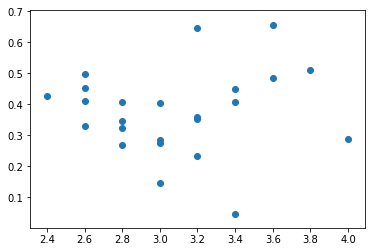

(0.08031567339237274, 0.7091009334493761)


In [50]:
plt.scatter(df_merged['Rating'],df_merged[('EDA','mean')])
plt.show()
print(pearsonr(df_merged['Rating'],df_merged[('EDA','mean')]))

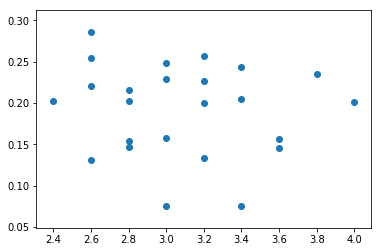

(-0.11693084300531066, 0.5863493429556512)


In [51]:
plt.scatter(df_merged['Rating'],df_merged[('EDA','std')])
plt.show()
print(pearsonr(df_merged['Rating'],df_merged[('EDA','std')]))

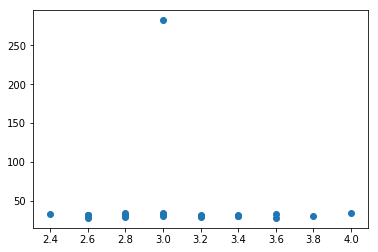

(-0.042398277564304886, 0.8440560003908101)


In [52]:
plt.scatter(df_merged['Rating'],df_merged[('TEMP','mean')])
plt.show()
print(pearsonr(df_merged['Rating'],df_merged[('TEMP','mean')]))

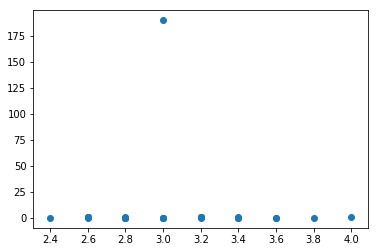

(-0.043617398631570034, 0.8396278355762887)


In [53]:
plt.scatter(df_merged['Rating'],df_merged[('TEMP','std')])
plt.show()
print(pearsonr(df_merged['Rating'],df_merged[('TEMP','std')]))

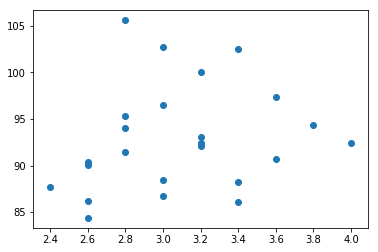

(0.2024861587267933, 0.34267155976960684)


In [54]:
plt.scatter(df_merged['Rating'],df_merged[('HR','mean')])
plt.show()
print(pearsonr(df_merged['Rating'],df_merged[('HR','mean')]))

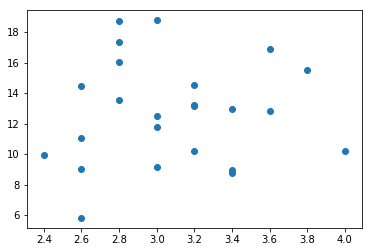

(0.06716200906129807, 0.7551826969422775)


In [55]:
plt.scatter(df_merged['Rating'],df_merged[('HR','std')])
plt.show()
print(pearsonr(df_merged['Rating'],df_merged[('HR','std')]))

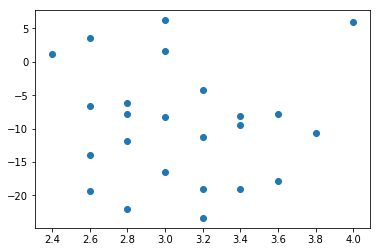

(-0.02407754326272473, 0.9110816562038392)


In [56]:
plt.scatter(df_merged['Rating'],df_merged[('Movement','mean')])
plt.show()
print(pearsonr(df_merged['Rating'],df_merged[('Movement','mean')]))

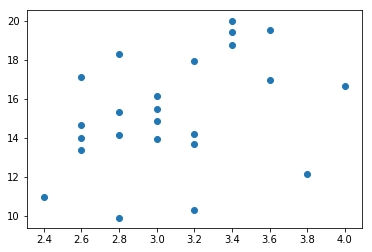

(0.37578271832186283, 0.07034815862094815)


In [57]:
plt.scatter(df_merged['Rating'],df_merged[('Movement','std')])
plt.show()
print(pearsonr(df_merged['Rating'],df_merged[('Movement','std')]))